In [47]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
# from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
# from sklearn.datasets import csv_ads

In [48]:
df = pd.read_csv('ads.csv')
df.shape

(200, 4)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [50]:
x = df.iloc[:,[0,1,2]].values
y = df["sales"]

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [52]:
m1 = LinearRegression()

In [53]:
m1.fit(x_train,y_train)

LinearRegression()

In [55]:
m1.score(x_train,y_train)

0.890307557755665

In [56]:
m1.fit(x_test,y_test)

LinearRegression()

In [57]:
m1.score(x_test,y_test)

0.9320801843215827

C:\Users\del\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


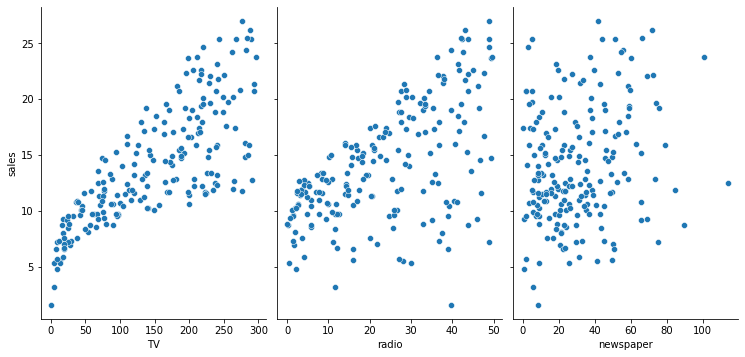

In [60]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', size=5, aspect=0.7)

In [61]:
m2 = smf.ols(formula='sales~radio+TV+newspaper',data=df).fit()
m2.params

Intercept    2.938889
radio        0.188530
TV           0.045765
newspaper   -0.001037
dtype: float64

In [62]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 19 May 2023   Prob (F-statistic):           1.58e-96
Time:                        04:44:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
radio          0.1885      0.009     21.893      0.000       0.172       0.206
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
feature_cols = ['TV']
X = df[feature_cols]
y = df.sales

In [18]:
m3 = LinearRegression()
m3.fit(x,y)

LinearRegression()

In [19]:
print(m3.intercept_)
print(m3.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [20]:
# X_new = pd.DataFrame({'radio':[51]})
# m.predict(X_new)

In [21]:
# m2.predict(51)

C:\Users\del\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


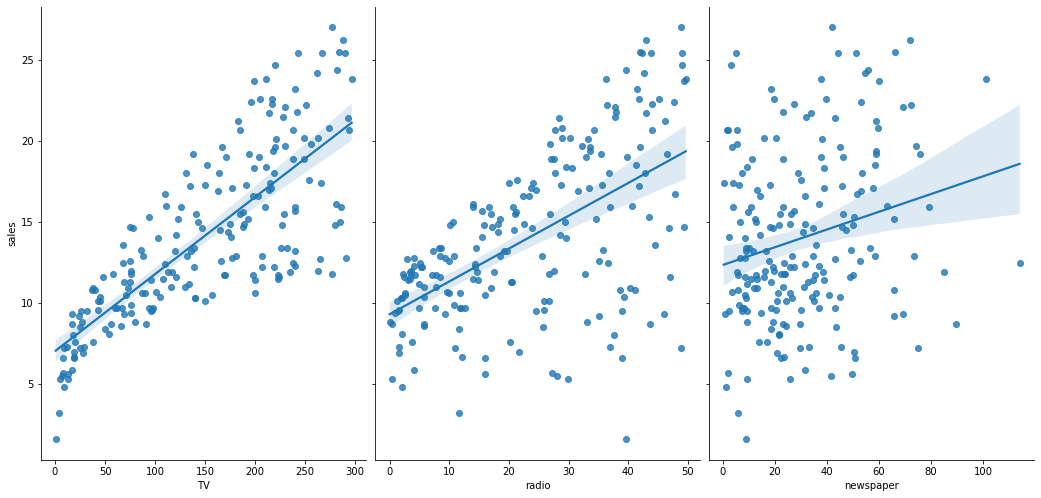

In [22]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7,
kind='reg')

In [23]:
m2.conf_int()

,0,1
Intercept,2.323762,3.554016
radio,0.171547,0.205513
TV,0.043014,0.048516
newspaper,-0.012616,0.010541


In [24]:
m2.pvalues

Intercept    1.267295e-17
radio        1.505339e-54
TV           1.509960e-81
newspaper    8.599151e-01
dtype: float64

In [25]:
m4 = smf.ols(formula='sales ~ TV + radio', data=df).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 19 May 2023   Prob (F-statistic):           4.83e-98
Time:                        04:38:54   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\del\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


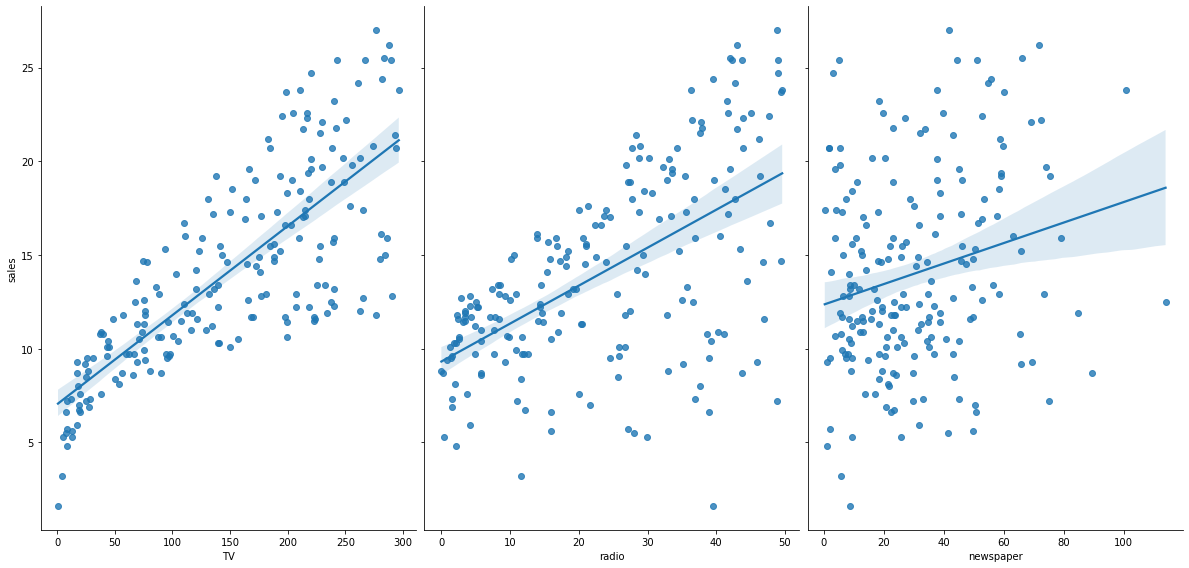

In [26]:
sns.pairplot(data=df, x_vars=['TV','radio','newspaper'], y_vars='sales', size=8, aspect=0.7,kind='reg')

In [27]:
m4.conf_int()

,0,1
Intercept,2.340343,3.501857
TV,0.043013,0.048497
radio,0.172139,0.203850


In [28]:
m4.rsquared

0.8971942610828957

In [29]:
X = df[['TV', 'radio', 'newspaper']]
y = df.sales

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =1)

In [31]:
m2 = LinearRegression()

In [32]:
m2.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = m2.predict(X_test)
print(y_pred)

[21.70910292 16.41055243  7.60955058 17.80769552 18.6146359  23.83573998
 16.32488681 13.43225536  9.17173403 17.333853   14.44479482  9.83511973
 17.18797614 16.73086831 15.05529391 15.61434433 12.42541574 17.17716376
 11.08827566 18.00537501  9.28438889 12.98458458  8.79950614 10.42382499
 11.3846456  14.98082512  9.78853268 19.39643187 18.18099936 17.12807566
 21.54670213 14.69809481 16.24641438 12.32114579 19.92422501 15.32498602
 13.88726522 10.03162255 20.93105915  7.44936831  3.64695761  7.22020178
  5.9962782  18.43381853  8.39408045 14.08371047 15.02195699 20.35836418
 20.57036347 19.60636679]


In [34]:
y_pred = m2.predict(X_test)

In [35]:
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [36]:
np.random.seed(12456)

In [37]:
nums = np.random.rand(len(df))
mask_suburban = (nums > 0.33) & (nums < 0.66)

In [38]:
m2.score(X_test,y_test)

0.9156213613792232

In [39]:
from sklearn.model_selection import KFold 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4]) 
kf = KFold(n_splits=2)
kf.get_n_splits(X)
# print(kf)
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)

In [40]:
for train_index, test_index in kf.split(X):
   print('TRAIN:', train_index, 'TEST:', test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   ('TRAIN:' ,np.array([2,3]), 'TEST:',np.array([0, 1]))
   ('TRAIN:' ,np.array([0, 1]), 'TEST:',np.array([2, 3]))

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [41]:
m3.score(x_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [2, 150]